In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, silhouette_score, ConfusionMatrixDisplay
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import to_categorical
import numpy as np

import warnings
warnings.filterwarnings("ignore")

/Users/nd_blaze/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


In [2]:
#Loading 
data = pd.read_csv("Customer Data.csv")
data.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


# Data Preparation

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [4]:
data.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [5]:
# finding null values

data.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

MINIMUM_PAYMENTS and CREDIT_LIMIT have missing values, so we fill it with the mean of the columns

In [6]:
# filling mean value in place of missing values in the dataset
data["MINIMUM_PAYMENTS"] = data["MINIMUM_PAYMENTS"].fillna(data["MINIMUM_PAYMENTS"].mean())
data["CREDIT_LIMIT"] = data["CREDIT_LIMIT"].fillna(data["CREDIT_LIMIT"].mean())

In [7]:
# finding null values
data.isnull().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

In [8]:
# drop CUST_ID column because it is not used
data.drop(columns=["CUST_ID"],axis=1,inplace=True)

# Scaling the DataFrame

In [9]:
scalar=StandardScaler()
scaled_df = scalar.fit_transform(data)

# Dimensionality reduction

Converting the DataFrame into 2D DataFrame for visualization

In [10]:
pca = PCA(n_components=2)
principal_components = pca.fit_transform(scaled_df)
pca_df = pd.DataFrame(data=principal_components ,columns=["PCA1","PCA2"])
pca_df

,PCA1,PCA2
0,-1.682221,-1.076453
1,-1.138300,2.506451
2,0.969692,-0.383485
3,-0.873630,0.043155
4,-1.599433,-0.688578
...,...,...
8945,-0.359628,-2.016138
8946,-0.564368,-1.639118
8947,-0.926203,-1.810780
8948,-2.336553,-0.657969


# Hyperparameter tuning
Finding 'k' value by Elbow Method

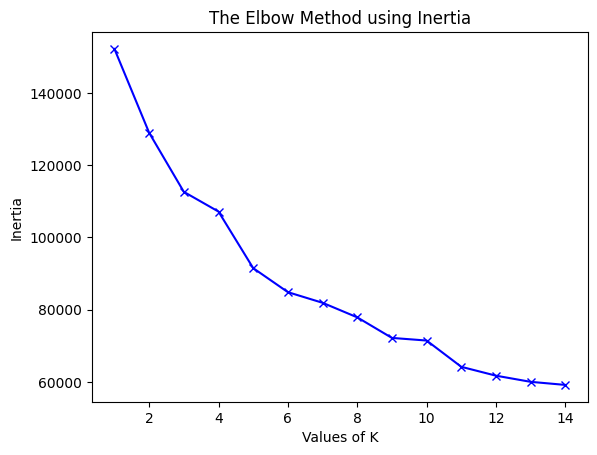

In [11]:
inertia = []
range_val = range(1,15)
for i in range_val:
    kmean = KMeans(n_clusters=i)
    kmean.fit_predict(pd.DataFrame(scaled_df))
    inertia.append(kmean.inertia_)
plt.plot(range_val,inertia,'bx-')
plt.xlabel('Values of K')
plt.ylabel('Inertia')
plt.title('The Elbow Method using Inertia')
plt.show()

Finding 'k' value by silhoutte Method

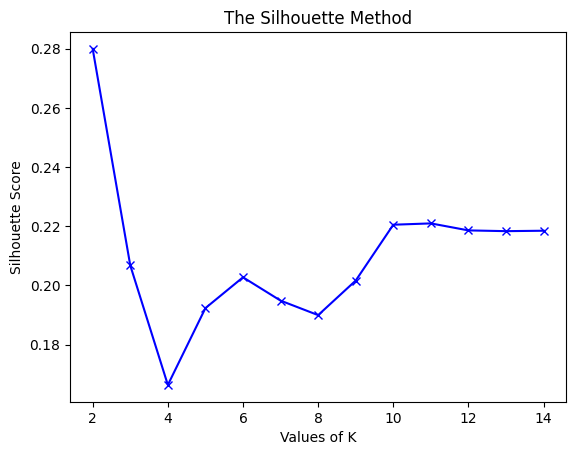

In [12]:
# Define the range of K values to test
range_val = range(2, 15)
silhouette_scores = []

for i in range_val:
    kmean = KMeans(n_clusters=i, random_state=42)
    labels = kmean.fit_predict(scaled_df)
    score = silhouette_score(scaled_df, labels)
    silhouette_scores.append(score)

# Plot the silhouette scores for each K
plt.plot(range_val, silhouette_scores, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Silhouette Score')
plt.title('The Silhouette Method')
plt.show()

# Model Building using KMeans

In [13]:
kmeans_model=KMeans(4)
kmeans_model.fit_predict(scaled_df)
pca_df_kmeans= pd.concat([pca_df,pd.DataFrame({'cluster':kmeans_model.labels_})],axis=1)

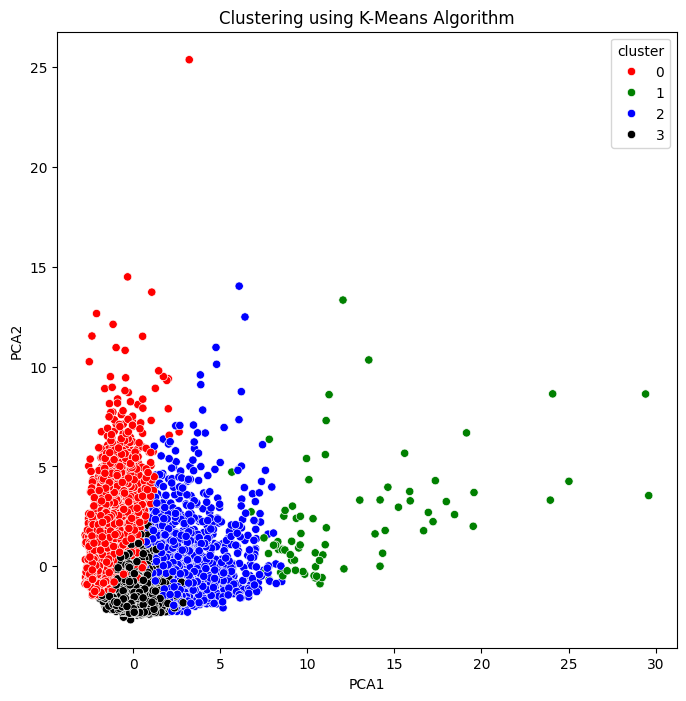

In [14]:
plt.figure(figsize=(8,8))
ax=sns.scatterplot(x="PCA1",y="PCA2",hue="cluster",data=pca_df_kmeans,palette=['red','green','blue','black'])
plt.title("Clustering using K-Means Algorithm")
plt.show()

In [15]:
# find all cluster centers
cluster_centers = pd.DataFrame(data=kmeans_model.cluster_centers_,columns=[data.columns])

# inverse transform the data
cluster_centers = scalar.inverse_transform(cluster_centers)
cluster_centers = pd.DataFrame(data=cluster_centers,columns=[data.columns])
cluster_centers

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,1979.063818,0.859210,237.293661,197.196433,40.243422,1646.257050,0.132507,0.084335,0.049345,0.227778,5.514772,2.468684,4261.202788,1566.545465,951.153450,0.033455,11.375561
1,4668.953085,0.973908,16581.995844,11309.515974,5272.479870,998.286372,0.924026,0.758127,0.768949,0.070346,2.415584,134.285714,12479.220779,16233.605172,3589.502940,0.393671,11.961039
2,2418.351760,0.982973,3020.915927,1975.365934,1045.963501,861.757949,0.932429,0.685010,0.645198,0.100692,2.643694,45.050310,7514.955203,3277.467113,1196.963036,0.238615,11.891799
3,551.580352,0.850822,725.330959,229.046587,496.744441,146.757769,0.753336,0.126245,0.644796,0.029549,0.539643,14.258853,3237.566150,901.908879,531.849957,0.268773,11.524287


In [16]:
# Creating a target/lable column "Cluster" for storing the cluster segment
data['Cluster'] = kmeans_model.labels_
cluster_df = data.copy()
cluster_df.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Cluster
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,0
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,0
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,2
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12,0
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,0


In [17]:
# finind the mean of each cluster group in order to place a lable for what type of customer each group can be defined as.
cluster_means = cluster_df.groupby('Cluster').mean()
cluster_means

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
Cluster,,,,,,,,,,,,,,,,,
0,1979.132569,0.859176,236.891688,197.023624,40.014293,1646.417439,0.132345,0.084248,0.049228,0.227725,5.512293,2.464066,4261.619148,1566.739669,951.150527,0.033463,11.375650
1,4668.953085,0.973908,16581.995844,11309.515974,5272.479870,998.286372,0.924026,0.758127,0.768949,0.070346,2.415584,134.285714,12479.220779,16233.605172,3589.502940,0.393671,11.961039
2,2413.863025,0.983020,3016.692474,1972.994584,1044.110261,860.196023,0.931974,0.684986,0.644258,0.100785,2.648110,44.987629,7505.635739,3270.849010,1194.753869,0.238646,11.891409
3,551.643304,0.850681,724.758529,228.157055,497.061976,146.831061,0.753339,0.125659,0.645193,0.029550,0.539837,14.251255,3236.221326,901.899551,532.159102,0.268712,11.523839


# Cluster Analysis

### Cluster 0

* Balance: High ($3556.15 on average).
* Purchases: Extremely high ($7680.43 on average), primarily from one-off purchases ($5099.74) but also significant installment purchases ($2582.16).
* Credit Limit: Very high ($9711.10).
* Payments: Very high ($7301.42 on average).
* PRC_FULL_PAYMENT: Moderate (0.29).
* Behavior: These are high spenders who use their credit cards extensively, especially for large one-off purchases and installments. They tend to make significant payments, although they don’t fully pay off their balances often.

#### Proposed Name: "High Spenders"


### Cluster 1

* Balance: Very high ($4581.66 on average).
* Purchases: Low ($493.15 on average).
* Cash Advance: Extremely high ($4485.17).
* Cash Advance Transactions: Very frequent (14.20 transactions on average).
* PRC_FULL_PAYMENT: Very low (0.03).
* Behavior: These customers rely heavily on cash advances rather than purchases. They rarely fully pay off their balance and likely use credit cards as a way to access immediate funds.

#### Proposed Name: "Cash Advance Seekers"


### Cluster 2

* Balance: Low ($1004.43 on average).
* Purchases: Low ($270.13 on average), mostly one-off purchases ($209.73).
* Cash Advance: Low ($589.87).
* Credit Limit: Low ($3271.46).
* Payments: Very low ($970.41).
* PRC_FULL_PAYMENT: Very low (0.08).
* Behavior: These are low-activity customers who use their credit cards minimally for both purchases and cash advances. They tend to maintain low balances and make small payments.

#### Proposed Name: "Minimal Users"

### Cluster 3

* Balance: Moderate ($895.69 on average).
* Purchases: Moderate ($1237.05 on average), with a balance of one-off purchases ($594.50) and installment purchases ($642.82).
* Cash Advance: Low ($210.76).
* Payments: Moderate ($1333.10).
* PRC_FULL_PAYMENT: Moderate (0.27).
* Behavior: These customers use their credit cards moderately, favoring installment-based purchases but also making one-off purchases. They make regular payments but may not pay off their balance in full.

#### Proposed Name: "Installment Users".

| Cluster | Proposed Name          | Key Characteristics                                                             |
|---------|-------------------------|---------------------------------------------------------------------------------|
| 0       | High Spenders           | High purchases (one-off + installment), high payments, high credit limits.      |
| 1       | Cash Advance Seekers    | Heavy reliance on cash advances, low purchases, rarely fully pay balances.      |
| 2       | Minimal Users           | Low activity across all features, minimal purchases, low balances.              |
| 3       | Installment Users       | Moderate purchases, preference for installment payments, moderate balances and payments. |


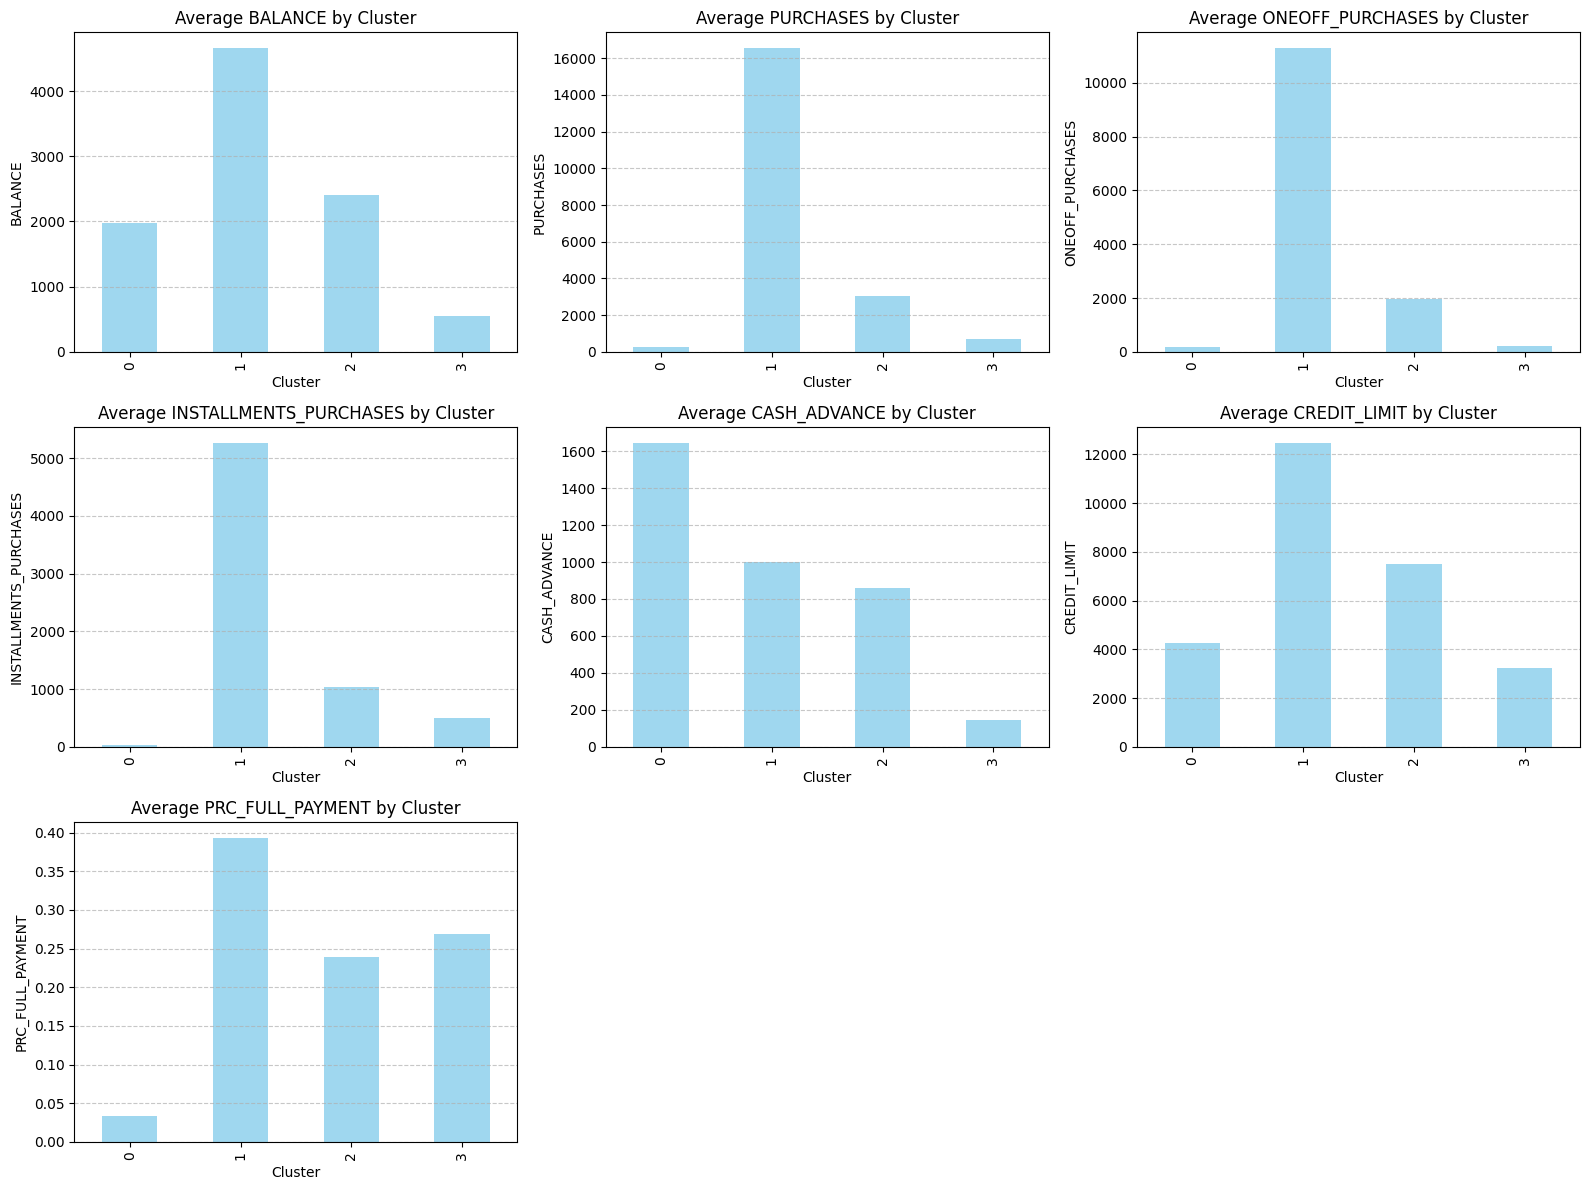

In [18]:

# Set the Cluster column as the index for better visualization
#cluster_means.set_index('Cluster', inplace=True)

# Select key features to plot
features_to_plot = ['BALANCE', 'PURCHASES', 'ONEOFF_PURCHASES',
                    'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'CREDIT_LIMIT', 'PRC_FULL_PAYMENT']

# Create a bar plot for each feature
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(16, 12))
axes = axes.flatten()

for i, feature in enumerate(features_to_plot):
    ax = axes[i]
    cluster_means[feature].plot(kind='bar', ax=ax, color='skyblue', alpha=0.8)
    ax.set_title(f'Average {feature} by Cluster', fontsize=12)
    ax.set_xlabel('Cluster', fontsize=10)
    ax.set_ylabel(feature, fontsize=10)
    ax.grid(axis='y', linestyle='--', alpha=0.7)

# Remove empty subplot if any
for j in range(len(features_to_plot), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


# Saving the kmeans clustering model and the data with cluster label

In [19]:
#Saving Scikitlearn models
import joblib
joblib.dump(kmeans_model, "./models/kmeans_model.pkl")

['./models/kmeans_model.pkl']

In [20]:
# saving the new dataset with cluster label/target
cluster_df.to_csv("./Clustered_Customer_Data.csv")

## Training and Testing Clustered_Customer_data using Neural Network for classification purpose

In [21]:
# Load and preprocess the dataset
cluster_data = pd.read_csv("./Clustered_Customer_Data.csv")
cluster_data.set_index('Unnamed: 0', inplace=True)
cluster_data.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Cluster
Unnamed: 0,,,,,,,,,,,,,,,,,,
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,0
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,0
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,2
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12,0
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,0


In [22]:
# Splitting features and target
X = cluster_data.drop(columns=['Cluster'])  # Features
y = cluster_data['Cluster']                 # Target

# One-hot encode the target variable for deep learning
y_categorical = to_categorical(y)

# Standardize the features for optimal performance in neural networks
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

#save scaller used in processing
joblib.dump(scaler, "./models/scaler.pkl")

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_categorical, test_size=0.2, random_state=42)

In [23]:


# Define the neural network model
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),  # Input layer with 64 neurons
    Dropout(0.3),                                                  # Dropout for regularization
    Dense(32, activation='relu'),                                 # Hidden layer with 32 neurons
    Dense(y_categorical.shape[1], activation='softmax')           # Output layer with softmax for multi-class classification
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, validation_split=0.2, epochs=10, batch_size=32, verbose=1)

# Extract metrics from the history object
train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

Epoch 1/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 0s 865us/step - accuracy: 0.7051 - loss: 0.7986 - val_accuracy: 0.9679 - val_loss: 0.1511
Epoch 2/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 0s 499us/step - accuracy: 0.9430 - loss: 0.1859 - val_accuracy: 0.9770 - val_loss: 0.0887
Epoch 3/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 0s 474us/step - accuracy: 0.9449 - loss: 0.1465 - val_accuracy: 0.9839 - val_loss: 0.0696
Epoch 4/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 0s 478us/step - accuracy: 0.9568 - loss: 0.1115 - val_accuracy: 0.9777 - val_loss: 0.0632
Epoch 5/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 0s 489us/step - accuracy: 0.9643 - loss: 0.0901 - val_accuracy: 0.9839 - val_loss: 0.0547
Epoch 6/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 0s 482us/step - accuracy: 0.9668 - loss: 0.0827 - val_accuracy: 0.9784 - val_loss: 0.0532
Epoch 7/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 0s 491us/step - accuracy: 0.9637 - loss: 0.0859 - val_accuracy: 0.9832 - val_loss: 0.0493
Epoch 8/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 0s 491us/step - accuracy: 0.9741 - loss: 0.0640 - 

In [24]:
# Save the trained model
model.save("./models/deep_learning_model.h5")
print("Model saved as ./models/deep_learning_model.h5")

Model saved as ./models/deep_learning_model.h5


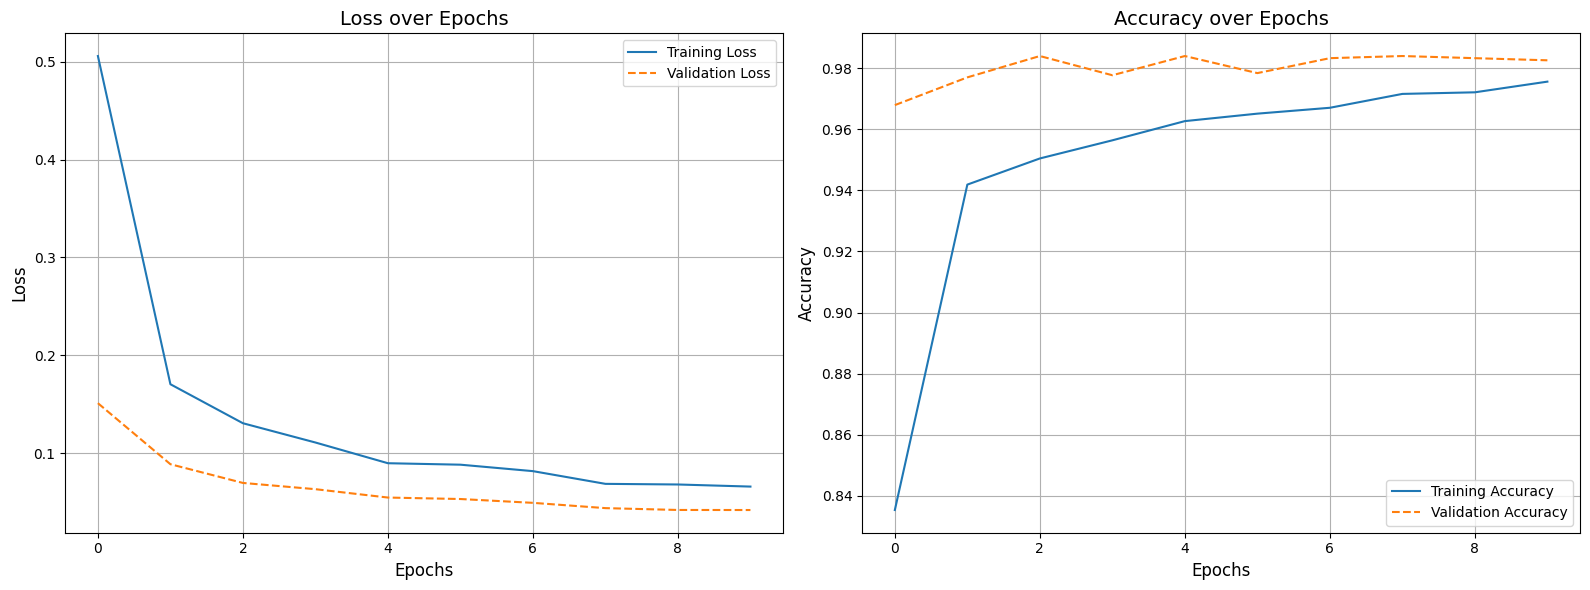

In [25]:
# Create subplots for Loss and Accuracy
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Plot Loss
axes[0].plot(train_loss, label='Training Loss')
axes[0].plot(val_loss, label='Validation Loss', linestyle='--')
axes[0].set_title('Loss over Epochs', fontsize=14)
axes[0].set_xlabel('Epochs', fontsize=12)
axes[0].set_ylabel('Loss', fontsize=12)
axes[0].legend()
axes[0].grid()

# Plot Accuracy
axes[1].plot(train_accuracy, label='Training Accuracy')
axes[1].plot(val_accuracy, label='Validation Accuracy', linestyle='--')
axes[1].set_title('Accuracy over Epochs', fontsize=14)
axes[1].set_xlabel('Epochs', fontsize=12)
axes[1].set_ylabel('Accuracy', fontsize=12)
axes[1].legend()
axes[1].grid()

# Adjust layout and display the plot
plt.tight_layout()
plt.show()



In [26]:
# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Accuracy: {accuracy:.2f}")

Test Accuracy: 0.99


In [27]:
# Predictions
y_pred_probabilities = model.predict(X_test)
y_pred = np.argmax(y_pred_probabilities, axis=1)
y_test_labels = np.argmax(y_test, axis=1)  # Convert one-hot encoding back to labels

56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 553us/step


In [30]:
from sklearn.metrics import accuracy_score

# Compute accuracy
test_accuracy = accuracy_score(y_test_labels, y_pred)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

Test Accuracy: 98.60%



Confusion Matrix:
 [[838   0   1   2]
 [  0  11   4   0]
 [  1   2 312   2]
 [  9   0   4 604]]

Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      0.99       841
           1       0.85      0.73      0.79        15
           2       0.97      0.98      0.98       317
           3       0.99      0.98      0.99       617

    accuracy                           0.99      1790
   macro avg       0.95      0.92      0.94      1790
weighted avg       0.99      0.99      0.99      1790



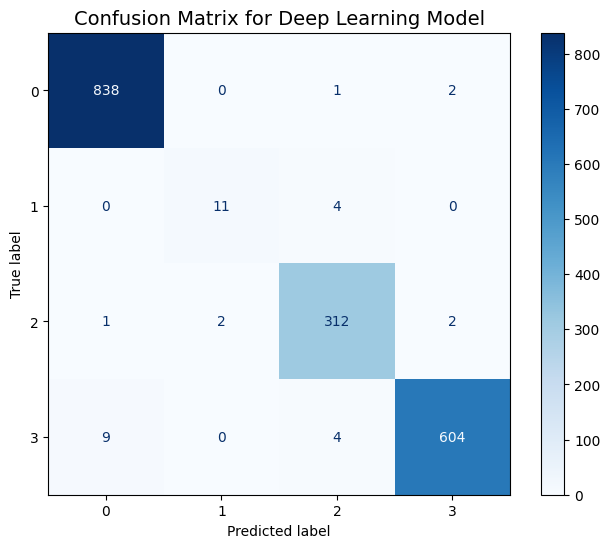

In [28]:


# Confusion Matrix
conf_matrix = confusion_matrix(y_test_labels, y_pred)
print("\nConfusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", classification_report(y_test_labels, y_pred))

# Plot the confusion matrix
fig, ax = plt.subplots(figsize=(8, 6))
ConfusionMatrixDisplay.from_predictions(y_test_labels, y_pred, cmap="Blues", ax=ax)
plt.title("Confusion Matrix for Deep Learning Model", fontsize=14)
plt.show()

